In [ ]:
# Creating data set
# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]
# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]

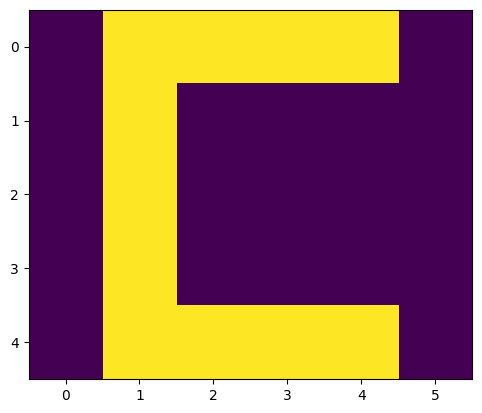

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(c).reshape(5, 6))
plt.show()


In [11]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [12]:
# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Feed-forward neural network
def f_forward(x, w1, w2):
    # Hidden layer
    z1 = x.dot(w1)          # input from layer 1
    a1 = sigmoid(z1)        # output from hidden layer
    z2 = a1.dot(w2)         # input to output layer
    a2 = sigmoid(z2)        # output of network
    return a2

# Initialize weights randomly
def generate_wt(x, y):
    li = []
    for i in range(x * y):
        li.append(np.random.randn())
    return np.array(li).reshape(x, y)

# Mean squared error (MSE) loss
def loss(out, y):
    s = np.square(out - y)
    s = np.sum(s) / len(y)
    return s

# Backpropagation
def back_prop(x, y, w1, w2, alpha):
    # Forward pass
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    # Error in output layer
    d2 = a2 - y
    d1 = np.multiply((w2.dot(d2.T)).T, np.multiply(a1, 1 - a1))

    # Gradients for w1 and w2
    w1_adj = x.T.dot(d1)
    w2_adj = a1.T.dot(d2)

    # Update weights
    w1 = w1 - alpha * w1_adj
    w2 = w2 - alpha * w2_adj

    return w1, w2


In [13]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[ 9.08444663e-01  1.84694654e-01 -4.09051237e-01 -2.76195785e-01
  -7.67559711e-01]
 [-1.16862420e+00 -1.52085746e+00 -8.22919412e-01  1.65816613e-01
   1.20625646e+00]
 [-3.44066088e-01  7.36901891e-01 -1.28581566e-01 -2.81907614e-01
  -3.53149424e-01]
 [ 2.50972947e+00 -5.01480619e-01 -6.32010399e-01 -2.64564124e-01
   2.23394990e+00]
 [ 4.00419516e-01 -7.29561753e-01 -3.62623420e-01 -8.28192746e-01
  -7.43274134e-01]
 [ 4.33542102e-01  8.56264795e-01 -1.21205170e-01  2.73823277e-01
  -5.39291478e-01]
 [-7.93911260e-01 -3.27591002e-01  1.48890289e+00 -1.05973781e+00
  -1.18064127e+00]
 [ 1.31472942e+00 -1.19547081e+00 -9.90141881e-01 -1.37293302e+00
  -1.04436506e-01]
 [-7.30694513e-01  1.99001068e-01 -2.54813355e+00  2.70995324e-01
  -1.57397729e+00]
 [ 1.37696394e+00  5.10528462e-01 -7.27204909e-01 -4.18868958e-02
  -7.09859129e-01]
 [ 1.40110558e+00 -7.89222125e-01 -1.38985496e-01 -3.29900964e-02
   1.96064537e+00]
 [ 2.72888500e-02 -5.33004538e-01 -3.52418279e-02 -4.46697427e-01

In [14]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc = []
    losss = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1 - (sum(l) / len(x))) * 100)
        acc.append((1 - (sum(l) / len(x))) * 100)
        losss.append(sum(l) / len(x))
    return (acc, losss, w1, w2)

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 68.6929410758821
epochs: 2 ======== acc: 70.8347884255785
epochs: 3 ======== acc: 72.72866635524784
epochs: 4 ======== acc: 74.3378650106515
epochs: 5 ======== acc: 75.66784850985353
epochs: 6 ======== acc: 76.79496072267176
epochs: 7 ======== acc: 77.79364298518459
epochs: 8 ======== acc: 78.70670943221522
epochs: 9 ======== acc: 79.55527270793563
epochs: 10 ======== acc: 80.35002699678436
epochs: 11 ======== acc: 81.09723220663415
epochs: 12 ======== acc: 81.80137912042075
epochs: 13 ======== acc: 82.46623444108442
epochs: 14 ======== acc: 83.09514667610426
epochs: 15 ======== acc: 83.69105408435547
epochs: 16 ======== acc: 84.2564211381337
epochs: 17 ======== acc: 84.79321458454197
epochs: 18 ======== acc: 85.30295780796563
epochs: 19 ======== acc: 85.78685292897961
epochs: 20 ======== acc: 86.24593175401145
epochs: 21 ======== acc: 86.68119128508133
epochs: 22 ======== acc: 87.09368329520746
epochs: 23 ======== acc: 87.48454955765027
epochs: 24 ======== acc:

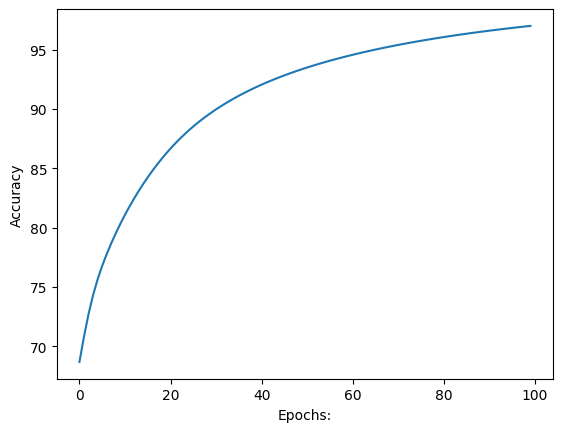

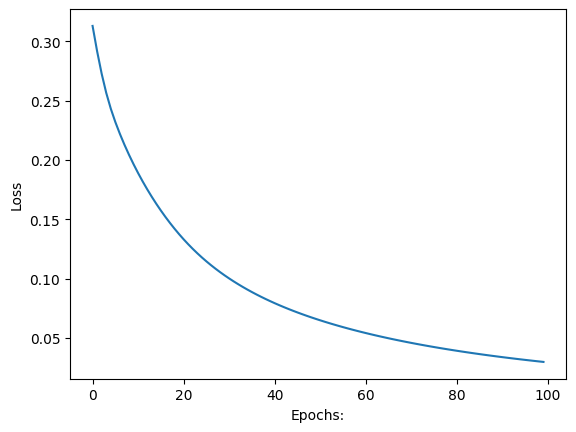

In [15]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

Image is of letter B.


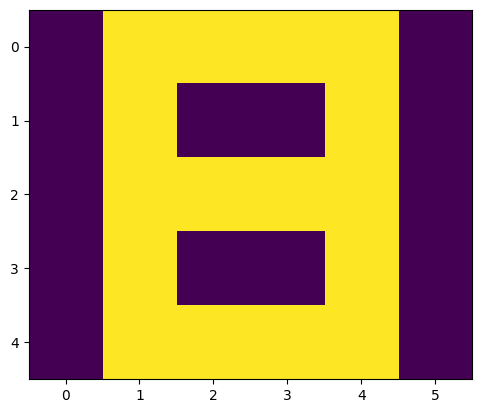

In [22]:
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if maxm < Out[0][i]:
            maxm = Out[0][i]
            k = i

    if k == 0:
        print("Image is of letter A.")
    elif k == 1:
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")

    plt.imshow(x.reshape(5, 6))
    plt.show()


# Example: Predicting for letter 'B'
predict(x[1], w1, w2)
